## Jeu de données Iris 

Nous allons utiliser le jeu de données Iris déjà rencontré dans les séances 
précédentes. Pour pouvoir afficher les résultats, on va utiliser seulement les 
premiers deux attributs (longueur et largeur des sépales).

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

On charge les données : 

In [69]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target


On conserve 50% du jeu de données pour l'évaluation :

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

On entraîne une machine à vecteur de support linéaire : 


In [71]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

On calcule le score d’échantillons bien classifiés sur le jeu de données de test, on utilise 2 méthodes pour ce calcul : 

In [72]:
# methode 1
accuracy_1 = lin_svc.score(X_test, y_test)
print(f'le score d’échantillons bien classifiés methode1:{accuracy_1}')
#methode 2
y_pred = lin_svc.predict(X_test)
accuracy_2 = (sum (y_test == y_pred)) / len(X_test)
print(f'le score d’échantillons bien classifiés methode2:{accuracy_2}')

le score d’échantillons bien classifiés methode1:0.7866666666666666
le score d’échantillons bien classifiés methode2:0.7866666666666666


Visualisons maintenant la surface de décision apprise par notre modèle :

In [73]:
def plot_surface(model):
  # Créer la surface de décision discretisée
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
  h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Surface de décision
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
  c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
  cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title("LinearSVC")

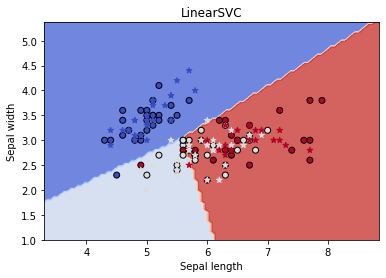

In [28]:
plot_surface(lin_svc)

On teste différentes valeurs pour le paramètre C, et on voit comment la frontière de 
décision évolue en fonction de C : 

In [74]:
def surface_changeC(c):
  lin_svc = svm.LinearSVC(C=c)
  lin_svc.fit(X_train, y_train)
  print(lin_svc.score(X_test,y_test))
  plot_surface(lin_svc)

0.7866666666666666


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


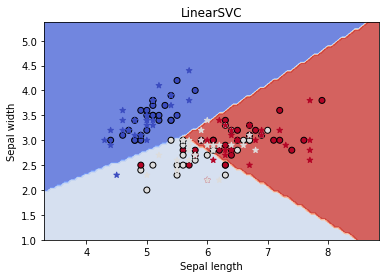

In [75]:
surface_changeC(3)

0.68


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


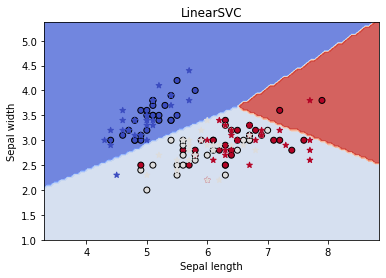

In [76]:
surface_changeC(10)


0.7466666666666667


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


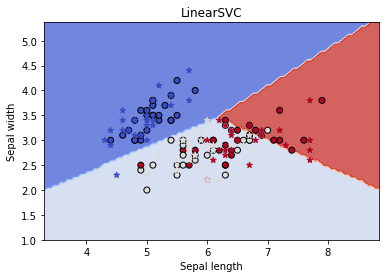

In [77]:
surface_changeC(100)


Quand on augmente le paramètre C, les frontières se tendent à minimiser la marge entre les classes pour bien classer les données d'entrainement, mais une valeur trop élevée peut donner un classifieur qui peut pas bien généraliser sur le test.
Il faudt soit utiliser un modèle non linéaire, soit ajouter des attributs supplémentaires en espérant qu'ils permettront de séparer linéairement les deux classes restantes.


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


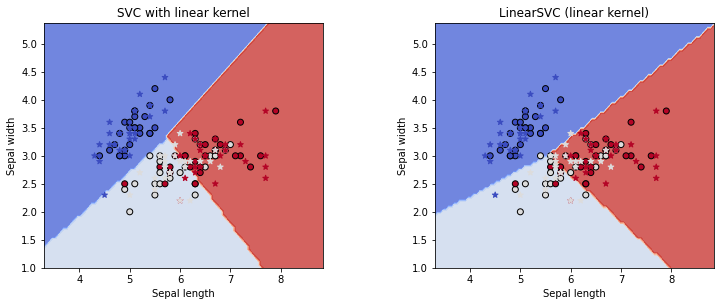

In [78]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
  plt.subplot(1, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Utiliser une palette de couleurs
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
  c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*',
  c=y_test, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title(titles[i])
plt.show()

Réalisons l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

In [42]:
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.96

Le score a augmenté cette fois en utilisant toutes les attributs , puisque les SVM sont très efficaces en dimension élevée.

## Jeu de données Digits 

In [117]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [118]:
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [119]:
print(lin_svc.score(X_test,y_test))

0.9410456062291435


In [120]:
from sklearn.model_selection import GridSearchCV
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size
=0.9)

In [121]:
values_of_C = [1.0 , 2.0 , 3.0 , 5.0]
parameters ={ "C": values_of_C }
model = svm . LinearSVC ()
grid_search = GridSearchCV ( estimator = model , param_grid = parameters ,
verbose = True )
grid_search . fit ( X_train , y_train )
print (" Meilleur paramètre à choisir : {} ". format ( grid_search .
best_params_ ) )
print (" Meilleur score obtenu : {} ". format ( grid_search . best_score_ ))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

 Meilleur paramètre à choisir : {'C': 1.0} 
 Meilleur score obtenu : 0.9049206349206351 


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
